In [1]:
import sys
import os
import pandas as pd
from IPython.display import display

In [2]:
sys.path.append(os.path.abspath('../src'))
from entrenamiento_modelo import generar_datos_y_entrenar,ver_analisis_grafico
modelo, X_test, y_test, acc_train, acc_test = generar_datos_y_entrenar()

Datos filtrados guardados en: ../csv/datos_modelo.csv
Entrenando el modelo...
Evaluando precisión...
Precisión del modelo (Test): 73.87%
 El modelo se guardo en: ../Modelos/modelo_random_forest.pkl!
 El encoder se guardo en: ../Modelos/codificador_equipos.pkl!


In [3]:
df_modelo = pd.read_csv('../csv/datos_modelo.csv')

df_modelo.info()
df_modelo.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        552 non-null    object
 1   home_team   552 non-null    object
 2   away_team   552 non-null    object
 3   home_score  552 non-null    int64 
 4   away_score  552 non-null    int64 
 5   tournament  552 non-null    object
 6   country     552 non-null    object
 7   neutral     552 non-null    bool  
 8   resultado   552 non-null    int64 
 9   home_code   552 non-null    int64 
 10  away_code   552 non-null    int64 
dtypes: bool(1), int64(5), object(5)
memory usage: 43.8+ KB


,date,home_team,away_team,home_score,away_score,tournament,country,neutral,resultado,home_code,away_code
0,1990-06-08,Cameroon,Argentina,1,0,World Cup,Italy,True,1,10,2
1,1990-06-09,Colombia,United Arab Emirates,2,0,World Cup,Italy,True,1,14,68
2,1990-06-09,Italy,Austria,1,0,World Cup,Italy,False,1,31,4
3,1990-06-09,Romania,Soviet Union,2,0,World Cup,Italy,True,1,48,59
4,1990-06-10,Czechoslovakia,United States,5,1,World Cup,Italy,True,1,18,69


In [4]:

print("TABLA DE RENDIMIENTO DEL MODELO")
tabla_rendimiento = pd.DataFrame({
    'Conjunto de Datos': ['Entrenamiento (Training)', 'Prueba (Testing)'],
    'Precisión (Accuracy)': [f"{acc_train:.2%}", f"{acc_test:.2%}"],
})

display(tabla_rendimiento)


diferencia = acc_train - acc_test
if diferencia > 0.15:
    print(f"El modelo memoriza un ({acc_train:.0%}) pero falla en pruebas ({acc_test:.0%}).")
else:
    print("El modelo está equilibrado.")



TABLA DE RENDIMIENTO DEL MODELO


,Conjunto de Datos,Precisión (Accuracy)
0,Entrenamiento (Training),95.92%
1,Prueba (Testing),73.87%


El modelo memoriza un (96%) pero falla en pruebas (74%).


Generando gráficas de análisis...


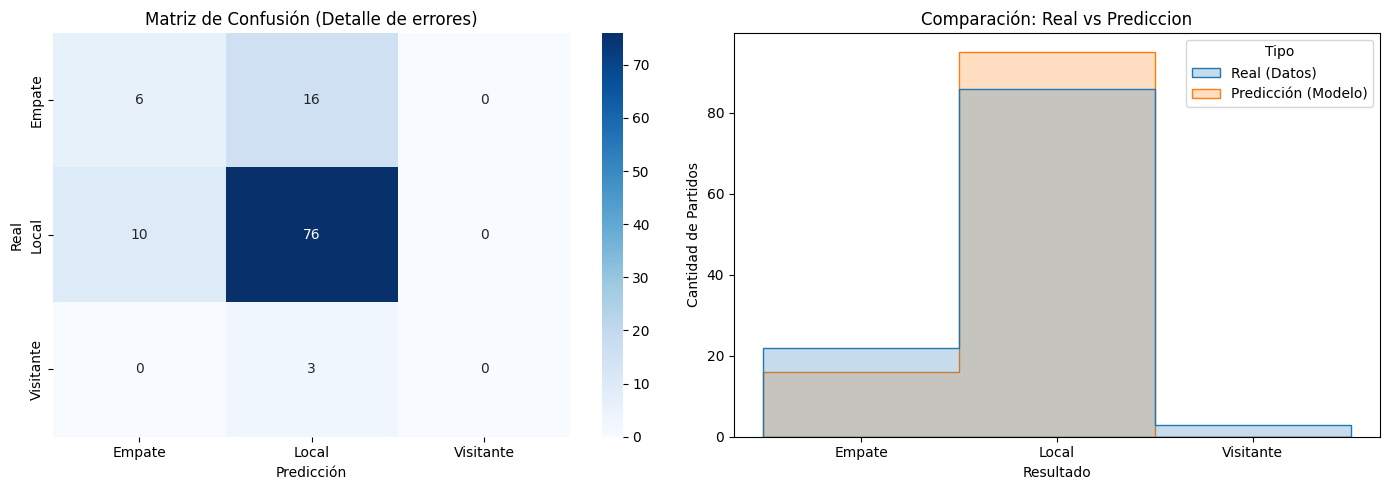

In [5]:

print("Generando gráficas de análisis...")
ver_analisis_grafico(modelo, X_test, y_test)

El modelo presenta un eveidente sesgo con la variable local, pues en la primera fila, se ve como la prediccion pasa 16 partidos como ganados por el local, cuando realmente son 6 y ninguno como visitante. El sesgo es aun mas evidente al ver como en la segunda fila la mayoria de la prediccion se centra unacmente en visitante o tambien al ver el segundo grafico y como la concentracion de local es mayormente elevada en la seccion naranja corespondiente al modelo. 

In [6]:
from graficas_colombia_modelo import procesar_datos_col, generar_grafica_col
from graficas_espana_modelo import procesar_datos_esp, generar_grafica_esp

In [7]:
ruta_csv='../csv/datos_modelo.csv'
df_modelo = pd.read_csv(ruta_csv)
df_modelo['date'] = pd.to_datetime(df_modelo['date'])

Tabla de datos generada para Colombia:


,date,home_team,away_team,goles_favor,resultado
1,1990-06-09,Colombia,United Arab Emirates,2,1
15,1990-06-14,Yugoslavia,Colombia,0,1
28,1990-06-19,Colombia,West Germany,1,0
36,1990-06-23,Cameroon,Colombia,1,1
55,1994-06-18,Romania,Colombia,1,1
65,1994-06-22,United States,Colombia,1,1
76,1994-06-26,Colombia,Switzerland,2,1
119,1998-06-15,Romania,Colombia,0,1
134,1998-06-22,Colombia,Tunisia,1,1
151,1998-06-26,England,Colombia,0,1


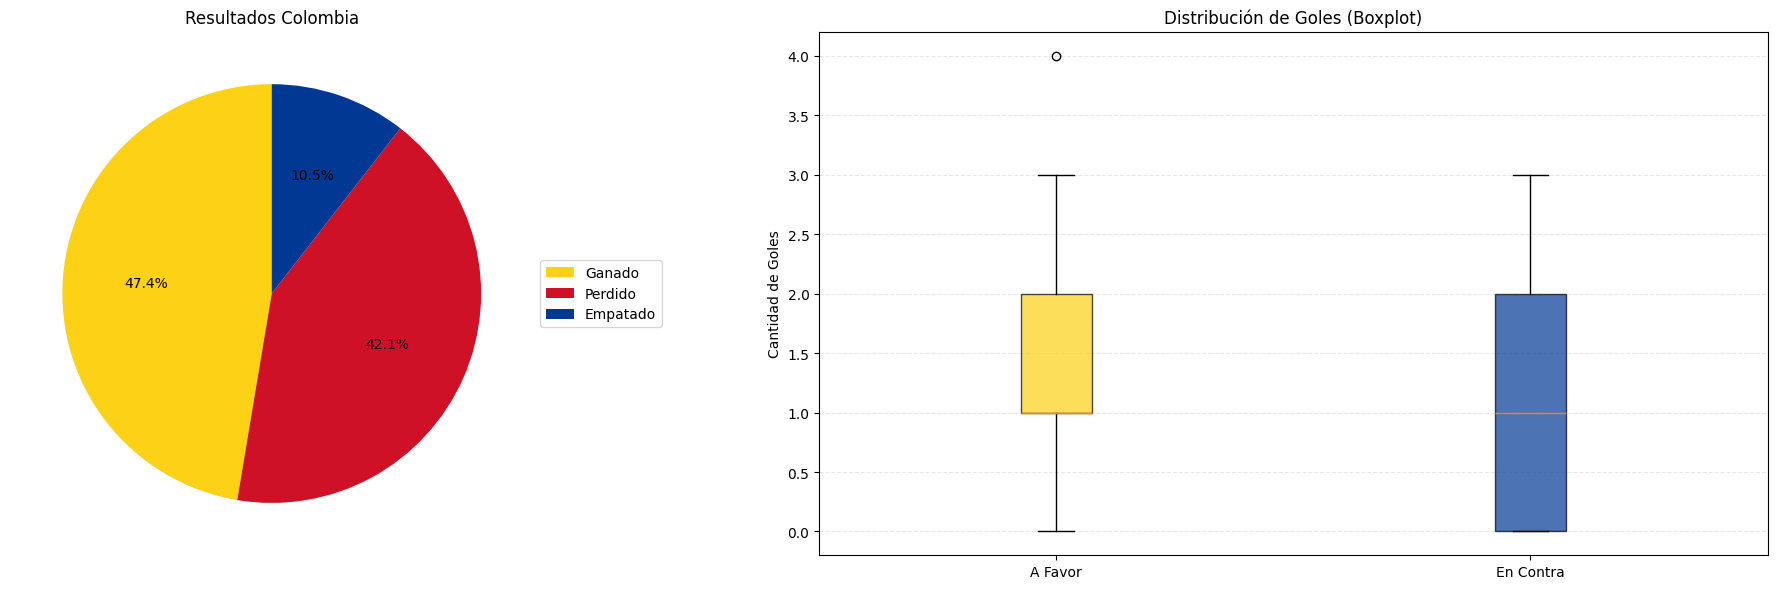

In [8]:
df_colombia = procesar_datos_col(df_modelo)
print("Tabla de datos generada para Colombia:")
display(df_colombia[['date', 'home_team', 'away_team', 'goles_favor', 'resultado']])

generar_grafica_col(df_colombia)

Al necesitarce mas datos, para analisar se tomaron dede 1900, local trajo una disminucion eviednte de victorias para colombia,
encuanto a su distribucion de goles, en su boxplot se evidencia el aumento encontra, mostrando que al menos algun partido tiene una victoria con valor atipico de goles, no obtante,la medida maxima de cada tipo de gol es de tres. Y la mayotria  suele tener un rango entre 1 - 2 goles. 


Tabla de datos generada para España:


,date,home_team,away_team,goles_favor,resultado
11,1990-06-13,Spain,Uruguay,0,0
21,1990-06-17,Spain,South Korea,3,1
34,1990-06-21,Spain,Belgium,2,1
43,1990-06-26,Yugoslavia,Spain,1,1
52,1994-06-17,South Korea,Spain,2,0
64,1994-06-21,Germany,Spain,1,0
79,1994-06-27,Spain,Bolivia,3,1
89,1994-07-02,Spain,Switzerland,3,1
97,1994-07-09,Italy,Spain,1,1
112,1998-06-13,Nigeria,Spain,2,1


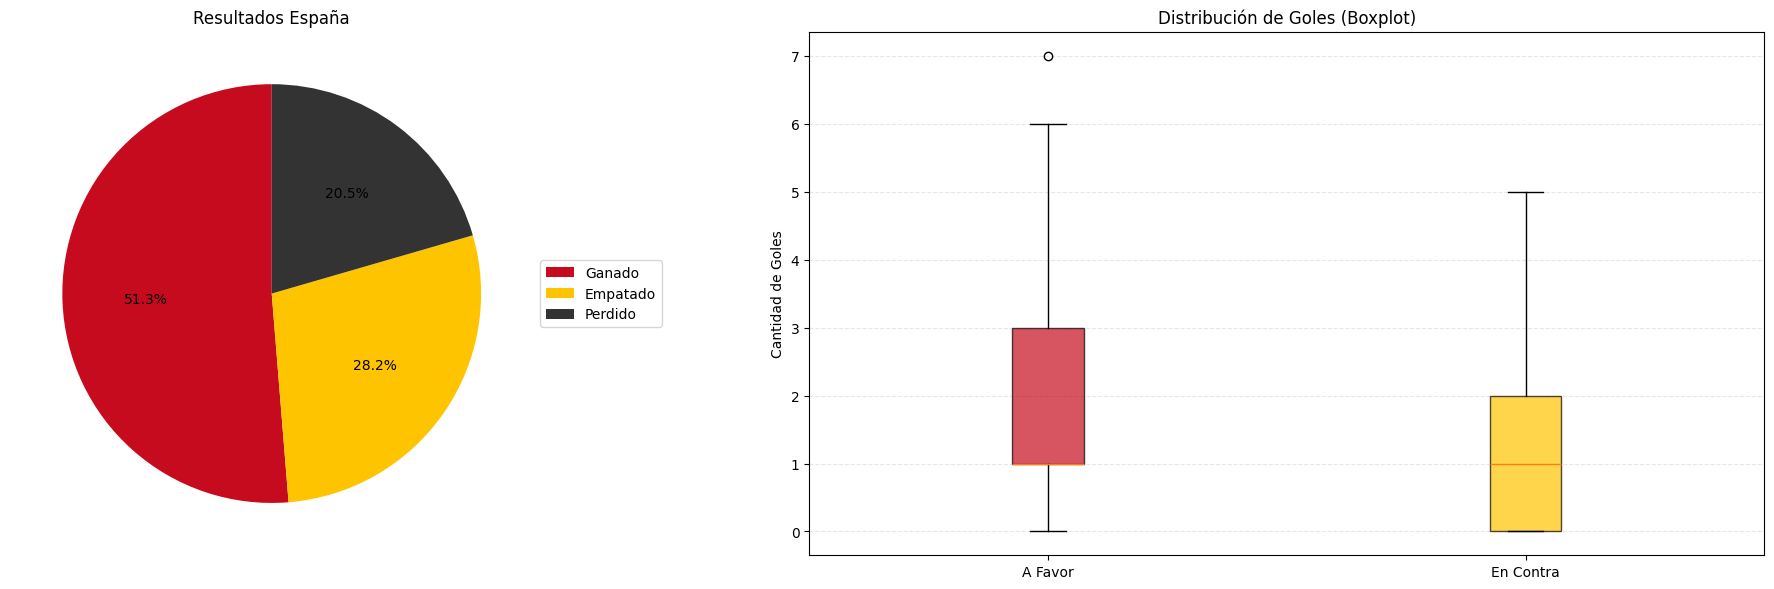

In [9]:
df_espana = procesar_datos_esp(df_modelo)
print("Tabla de datos generada para España:")
display(df_espana[['date', 'home_team', 'away_team', 'goles_favor', 'resultado']])
generar_grafica_esp(df_espana)

Acomparacion de comlombia, españa gano porcetaje (un 1%) en victoras, no es mucho pero muetsra una mayor tendencia a tener
goles a favor, aunque empate y predida siguen teniendo una distribucion de casi "25-25" en el resto de juegos.Y por su boxplot 
se logra distingir la diferencia entre goles a favor y encontra.